In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Aquí abro la primera ola de respuestas en pystoolkit

In [2]:
data1 = pd.read_csv('data.csv',index_col = False)

In [3]:
data1.head(3)

,participant,age:1,gender:1,noticias:1,antecedente_psiq:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,2.0,4.0,4.0,1.0,4.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0


### Aquí abro la segunda ola de respuestas en psytoolkit

In [4]:
data2 = pd.read_csv('data(1).csv',index_col = False)

In [5]:
data2.head(3)

,participant,age:1,gender:1,noticias:1,antecedente_psiq:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.dcd89188-069a-4275-8995-09e3e6b45d9b.txt,26.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,...,2.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-16-22-59,2020-04-16-23-08,9.0
1,s.0138202f-e9fc-4aa4-a2f7-7aaf8e4fabca.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-21-01-03,NaN,NaN
2,s.9bf647bc-310b-4adf-8232-6c572e711642.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-21-01-07,NaN,NaN


### Aquí junto ambos datasets para obtener uno solo sobre el cual trabajar

In [6]:
data = data1.append(data2)

In [7]:
data.head()

,participant,age:1,gender:1,noticias:1,antecedente_psiq:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,2.0,4.0,4.0,1.0,4.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0
3,s.837f8d44-fe44-4f84-84e8-2e287df5adac.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-09-05-11,NaN,NaN
4,s.9d49ad45-bde5-40ec-b9bb-8eab0bbfcc62.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-09-04-50,NaN,NaN


### Aquí simplemente elimino todas aquellas entradas que hayan dejado, al menos, una pregunta sin responder


a su vez, hago unas correcciones al dataset para que se a más fácil de leer y entender

In [8]:
#Elimino todas las filas que tengan mínimo una entrada vacía 
data = data.dropna()
#Verifico mi base de datos
data.head()

,participant,age:1,gender:1,noticias:1,antecedente_psiq:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,2.0,4.0,4.0,1.0,4.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0
5,s.8f9db3a9-cfe7-4281-9051-75522b8d2422.txt,20,1.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-01-06-09,2020-04-01-06-30,21.0
6,s.39ef9de8-8083-4e81-8e6a-136bf9d7401e.txt,45,2.0,2.0,2.0,3.0,5.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-08-05-09,2020-04-08-05-39,30.0


In [9]:
#Primero renombro mis columnas para que me sea más fácil utilizarlas:
columnas = {'gender:1':'genero','ndc:1':'uno','ndc:2':'dos','ndc:3':'tres','ndc:4':'cuatro','ndc:5':'cinco','ndc:6':'seis','ndc:7':'siete',
           'ndc:8':'ocho','ndc:9':'nueve','ndc:10':'diez','ndc:11':'once','ndc:12':'doce','ndc:13':'trece',
           'ndc:14':'catorce','ndc:15':'quince','ndc:16':'dieciseis','ndc:17':'diecisiete','ndc:18':'dieciocho'}
#Renombro las columnas
data = data.rename(columns=columnas)
#Hago una distinción y discrimino todas las columnas que no utilizaré:
data = data[['genero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece',
            'catorce','quince','dieciseis','diecisiete','dieciocho','noticias:1','antecedente_psiq:1','previo:1',
            'previo:2','previo:3','previo:4']]
#Como todos mis elementos son booleanos o enteros, cambio el formato de todas las columnas para que sean valores enteros
data = data.astype(int)
#Verifico que mi información se haya guardado correctamente
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,...,quince,dieciseis,diecisiete,dieciocho,noticias:1,antecedente_psiq:1,previo:1,previo:2,previo:3,previo:4
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,3,2,0,0,1,0
1,2,3,5,1,1,1,5,1,3,4,...,5,1,1,5,1,2,0,0,1,0
2,2,4,4,1,4,2,2,1,3,2,...,4,2,2,3,1,2,0,0,0,1
5,1,4,4,1,1,2,3,2,1,2,...,5,1,1,4,2,2,0,0,1,0
6,2,3,5,1,3,3,3,1,3,5,...,5,1,1,1,2,2,0,0,0,1


In [10]:
#Aquí calculo el promedio de respuesta del TNC por alumno 
data['promedio tnc'] = (data['uno'] + data['dos'] + data['tres']+data['cuatro']+
                                 data['cinco']+data['seis']+data['siete']+data['ocho']
                                 +data['nueve']+data['diez']+data['once']+data['doce']
                                 +data['trece']+data['catorce']+data['quince']+data['dieciseis']+data['diecisiete']+data['dieciocho'])/18
#Verifico que mi información se haya cargado correctamente
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,...,dieciseis,diecisiete,dieciocho,noticias:1,antecedente_psiq:1,previo:1,previo:2,previo:3,previo:4,promedio tnc
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,3,2,0,0,1,0,1.000000
1,2,3,5,1,1,1,5,1,3,4,...,1,1,5,1,2,0,0,1,0,3.111111
2,2,4,4,1,4,2,2,1,3,2,...,2,2,3,1,2,0,0,0,1,2.722222
5,1,4,4,1,1,2,3,2,1,2,...,1,1,4,2,2,0,0,1,0,2.777778
6,2,3,5,1,3,3,3,1,3,5,...,1,1,1,2,2,0,0,0,1,2.888889


In [ ]:
#Para un mejor manejo y entendimiento, reemplazo los géneros 
data['genero'] = data['genero'].replace(1,'hombre')
data['genero'] = data['genero'].replace(2,'mujer')

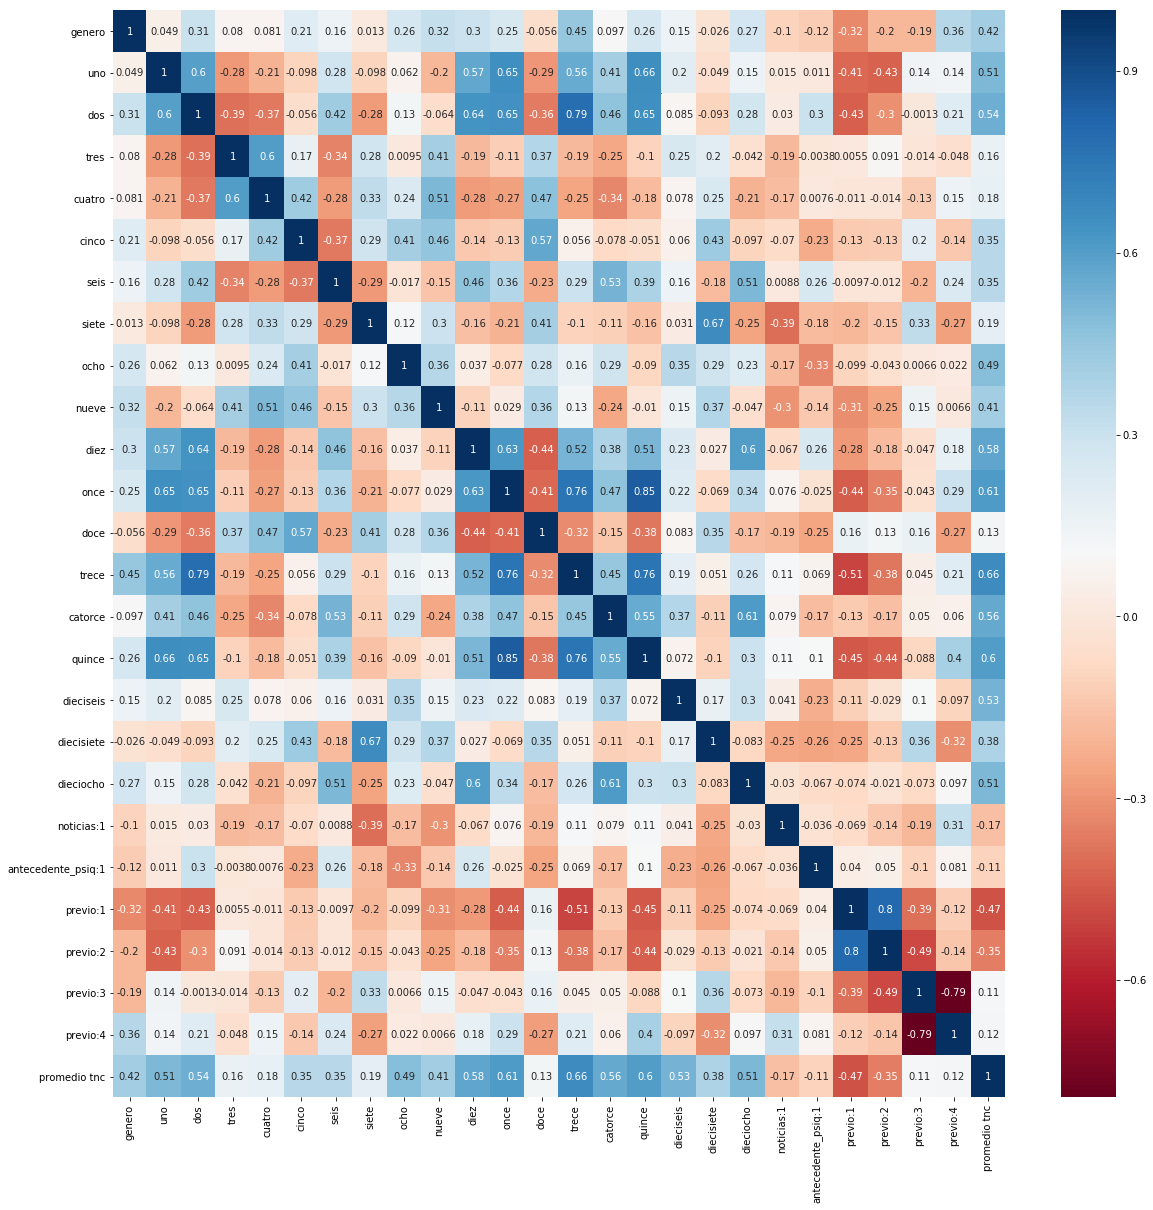

In [11]:
#Aquí hago una matriz de correlación para ver las relaciones entre respuestas
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize = (20,20))
#Heatmap
sns.heatmap(correlation_matrix, annot=True,cmap='RdBu')
#plt.savefig('enviar-jorge-hevia.jpg')

### Calculo el p valor 




No había calculado antes el p valor de esta manera, estuve leyendo y según yo, es correcto en cómo lo hice, sin embargo, dejo aquí el cómo y por qué funciona
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

##### Relacionadas con el promedio

In [30]:
genero = data['genero'].tolist()
promedio = data['promedio tnc'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(genero,promedio)
print('Significacncia estadística entre el género y el promedio obtenido',p_value)

Significacncia estadística entre el género y el promedio obtenido 0.010537162049338992


In [31]:
genero = data['noticias:1'].tolist()
promedio = data['promedio tnc'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(genero,promedio)
print('Significacncia estadística entre le noticias:1 y el promedio obtenido',p_value)

Significacncia estadística entre le noticias:1 y el promedio obtenido 0.3211269262611571


In [32]:
genero = data['antecedente_psiq:1'].tolist()
promedio = data['promedio tnc'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(genero,promedio)
print('Significacncia estadística entre antecedente_psiq:1 y el promedio obtenido',p_value)

Significacncia estadística entre antecedente_psiq:1 y el promedio obtenido 0.5292809371200506


##### Relacionadas con el género

In [29]:
genero = data['genero'].tolist()
promedio = data['noticias:1'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(genero,promedio)
print('Significacncia estadística entre el género y las noticas:1 es ',p_value)

Significacncia estadística entre el género y las noticas:1 es  0.5419587054985379


In [33]:
genero = data['genero'].tolist()
promedio = data['antecedente_psiq:1'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(genero,promedio)
print('Significacncia estadística entre antecedente_psiq:1 y el promedio obtenido',p_value)

Significacncia estadística entre antecedente_psiq:1 y el promedio obtenido 0.4695195098388131
